# Decision Tree - regression --->  PHASE 1 model creation. 
## PROBLEM STATEMENT: 
### Profit prediction for startups based on the investment rate in different departments

In [23]:
# read the data set
import pandas as pd
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [24]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [25]:
# convert categorial into numerical data
dataset = pd.get_dummies(dataset, drop_first=True, dtype=int)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [26]:
# split i/p o/p
independent = dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York' ]]
independent.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [27]:
dependent = dataset[[ 'Profit']] 
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [28]:
# split train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent, dependent, test_size=0.20, random_state=0)

In [29]:
x_test 

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
28,66051.52,182645.56,118148.20,1,0
11,100671.96,91790.61,249744.55,0,0
10,101913.08,110594.11,229160.95,1,0
41,27892.92,84710.77,164470.71,1,0
2,153441.51,101145.55,407934.54,1,0
27,72107.60,127864.55,353183.81,0,1
38,20229.59,65947.93,185265.10,0,1
31,61136.38,152701.92,88218.23,0,1
22,73994.56,122782.75,303319.26,1,0
4,142107.34,91391.77,366168.42,1,0


In [30]:
y_test

,Profit
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94


In [135]:
# model creation 
"""
criterion   {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
splitter   {“best”, “random”}, default=”best”
max_features  int, float or {“sqrt”, “log2”}, default=None
"""
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='squared_error',splitter='best')
regressor.fit(x_train,y_train)  # i/p  o/p

DecisionTreeRegressor()

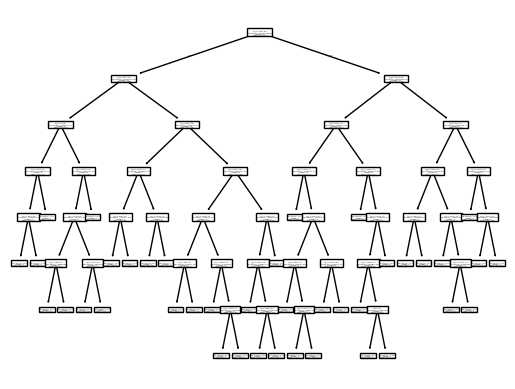

In [136]:
# tree - data visulization 
import matplotlib.pyplot as plt 
from sklearn import tree
tree.plot_tree(regressor)   # visulize my tree model
plt.show()  #  show graph

In [137]:
# test the model 
y_predicted = regressor.predict(x_test)
y_predicted

array([101004.64, 141585.52, 141585.52,  78239.91, 182901.99, 108733.99,
        71498.49,  99937.59, 108733.99, 156991.12])

In [138]:
# evaluation metrics
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_predicted)
r_score

0.9764409182568788

In [1]:
# save the model 
# import pickle 
# pickle.dump(regressor, open("finalized_model_decisionTreeRegressor.sav", "wb"))

In [2]:
#  load the model and predictcc
# loaded_model = pickle.load(open("finalized_model_decisionTreeRegressor.sav" ,"rb"))

## decision tree regressor - functions 

In [141]:
regressor.get_depth()

7

In [142]:
regressor.get_n_leaves()

np.int64(40)

In [143]:
regressor.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}